In [1]:
import torch
import torch.nn as nn

In [3]:

class DEC(nn.Module):#this neural model Deep embedded clustering uses pytorch -- used for unsupervised clustering and assign them cluster label
    def __init__(self, input_dim, hidden_dim, n_clusters): 
        super(DEC, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim // 2)
        )
        self.clustering_layer = nn.Linear(hidden_dim // 2, n_clusters)

    def forward(self, x):
        embeddings = self.encoder(x)
        clusters = self.clustering_layer(embeddings) 
        return clusters, embeddings

In [4]:
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim)
        )
        self.fc_mu = nn.Linear(latent_dim, latent_dim)
        self.fc_var = nn.Linear(latent_dim, latent_dim)

    def encode(self, x):
        x = self.encoder(x)
        return self.fc_mu(x), self.fc_var(x)

In [5]:
import torch.nn.functional as F

def contrastive_loss(embedding_1, embedding_2, tau=0.5):
    # Compute cosine similarity
    cos_sim = F.cosine_similarity(embedding_1, embedding_2)
    # Apply the contrastive loss with temperature scaling
    return -torch.mean(F.log_softmax(cos_sim / tau, dim=1))

In [4]:
import pandas as pd
reddit = pd.read_csv("reddit_posts_with_comments.csv")  
post = reddit["selftext"]
post_clean = reddit["selftext"].fillna("").astype(str)
post_clean = post_clean[post_clean.str.strip().str.len() > 0]
posts = post_clean.tolist()

In [14]:
conda install pytorch torchvision torchaudio -c pytorch


2 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - pytorch
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/radiahkhan/Documents/memex/.conda

  added / updated specs:
    - pytorch
    - torchaudio
    - torchvision


The following NEW packages will be INSTALLED:

  pytorch            pytorch/osx-arm64::pytorch-2.2.2-py3.11_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [3]:
%%bash
pip uninstall transformers -y
pip install transformers==4.41.1


Found existing installation: transformers 4.57.1
Uninstalling transformers-4.57.1:
  Successfully uninstalled transformers-4.57.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/9.1 MB ? eta -:--:--━━━━━━━╸━━━ 8.4/9.1 MB 46.1 MB/s eta 0:00:01━━━━━━━━━━━ 9.1/9.1 MB 40.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.4 MB ? eta -:--:--━━━━━━━━━━━ 2.4/2.4 MB 38.4 MB/s  0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 1/2 [transformers]━━━━━━━━━━━━━━━━━ 1/2 [transformers]━━━━━━━━━━━━━━━━━ 1/2 [transformers]━━━━━━━━━━━━━━━━━ 1/2 [transformers]━━━━━━━━━━━━━━━━━ 1/2 [transformers]━━━━━━━━━━━━━━━━━ 1/2 [transformers]━━━━━━━━━━━━━━━━━ 1/2 [transformers]━━━━━━━━━━━━━━━━━ 1/2 [transformers]━━━━━━━━━━━━━━━━━ 1/2 [transformers]━━━━━━━━━━━━━━━━━ 1/2 [transformers]━━━━━━━━━━━━━━━━━ 1/2 [transformers]

In [14]:
!pip uninstall sentence-transformers -y
!pip install sentence-transformers==2.5.1


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Found existing installation: sentence-transformers 2.5.1
Uninstalling sentence-transformers-2.5.1:
  Successfully uninstalled sentence-transformers-2.5.1


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached sentence_transformers-2.5.1-py3-none-any.whl.metadata (11 kB)
Using cached sentence_transformers-2.5.1-py3-none-any.whl (156 kB)


In [2]:
import pandas as pd
reddit = pd.read_csv("reddit_posts_with_comments.csv")  
post = reddit["selftext"]
post_clean = reddit["selftext"].fillna("").astype(str)
post_clean = post_clean[post_clean.str.strip().str.len() > 0]
posts = post_clean.tolist()

In [3]:
from transformers import AutoModel, AutoConfig  # Only needed if you manually load a HF encoder
from sentence_transformers import SentenceTransformer
import numpy as np
import torch

# Load pretrained miniLM encoder from SentenceTransformers
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings (already torch.FloatTensor)
embeddings = model.encode(posts, show_progress_bar=True, convert_to_tensor=True)

# More efficient than torch.tensor(...)
X = embeddings.float()

print("➡ Embeddings ready for clustering:", X.shape)



/Users/radiahkhan/Documents/memex/.conda/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Batches: 100%|██████████| 31/31 [00:06<00:00,  4.63it/s]

➡ Embeddings ready for clustering: torch.Size([979, 384])


# Pre processing pipeline

PCA and then t-SNE 
https://towardsdatascience.com/how-t-sne-outperforms-pca-in-dimensionality-reduction-7a3975e8cbdb/


In [9]:
!pip install numpy
!pip install scikit-learn
!pip install umap-learn



PCA shape: torch.Size([979, 100])


/Users/radiahkhan/Documents/memex/.conda/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


UMAP shape: (979, 2)


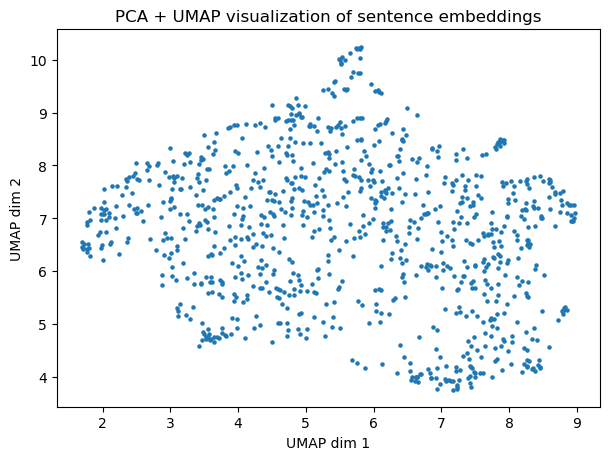

In [4]:
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"  

import torch
import numpy as np          
import umap                 
import matplotlib.pyplot as plt

X_cpu = X.detach().cpu()   

U, S, V = torch.pca_lowrank(X_cpu, q=100)
X_pca = torch.matmul(X_cpu, V[:, :100]) 
print("PCA shape:", X_pca.shape)

X_pca_list = X_pca.tolist()                     
X_pca_np = np.array(X_pca_list, dtype=np.float32) 

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_pca_np)     
print("UMAP shape:", X_umap.shape)

plt.figure(figsize=(7, 4.9))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=5)
plt.title("PCA + UMAP visualization of sentence embeddings")
plt.xlabel("UMAP dim 1")
plt.ylabel("UMAP dim 2")
plt.savefig("PCA_UMAP.png", dpi=300)
plt.show()



/Users/radiahkhan/Documents/memex/.conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/radiahkhan/Documents/memex/.conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 2 clusters
Noise points: 212


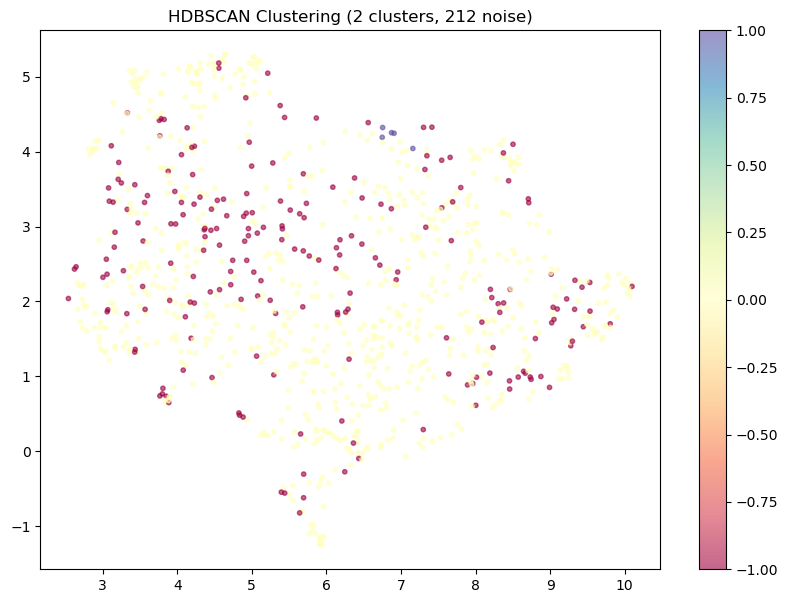

In [15]:
from hdbscan import HDBSCAN

clusterer = HDBSCAN(
    min_cluster_size=5,     
    min_samples=1,          
    metric='euclidean',
    cluster_selection_epsilon=0.5
)
cluster_labels = clusterer.fit_predict(X_pca_np)

# Check results
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Found {n_clusters} clusters")
print(f"Noise points: {n_noise}")

# Visualize
X_umap = umap_model.fit_transform(X_pca_np)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_umap[:, 0], 
    X_umap[:, 1], 
    c=cluster_labels,
    cmap='Spectral',
    s=10,
    alpha=0.6
)
plt.colorbar(scatter)
plt.title(f"HDBSCAN Clustering ({n_clusters} clusters, {n_noise} noise)")
plt.savefig("HDBSCAN_clusters.png", dpi=300)
plt.show()

Testing different k values...

Cluster sizes:
  Cluster  0: 519 posts (53.0%) ██████████████████████████
  Cluster  1: 460 posts (47.0%) ███████████████████████


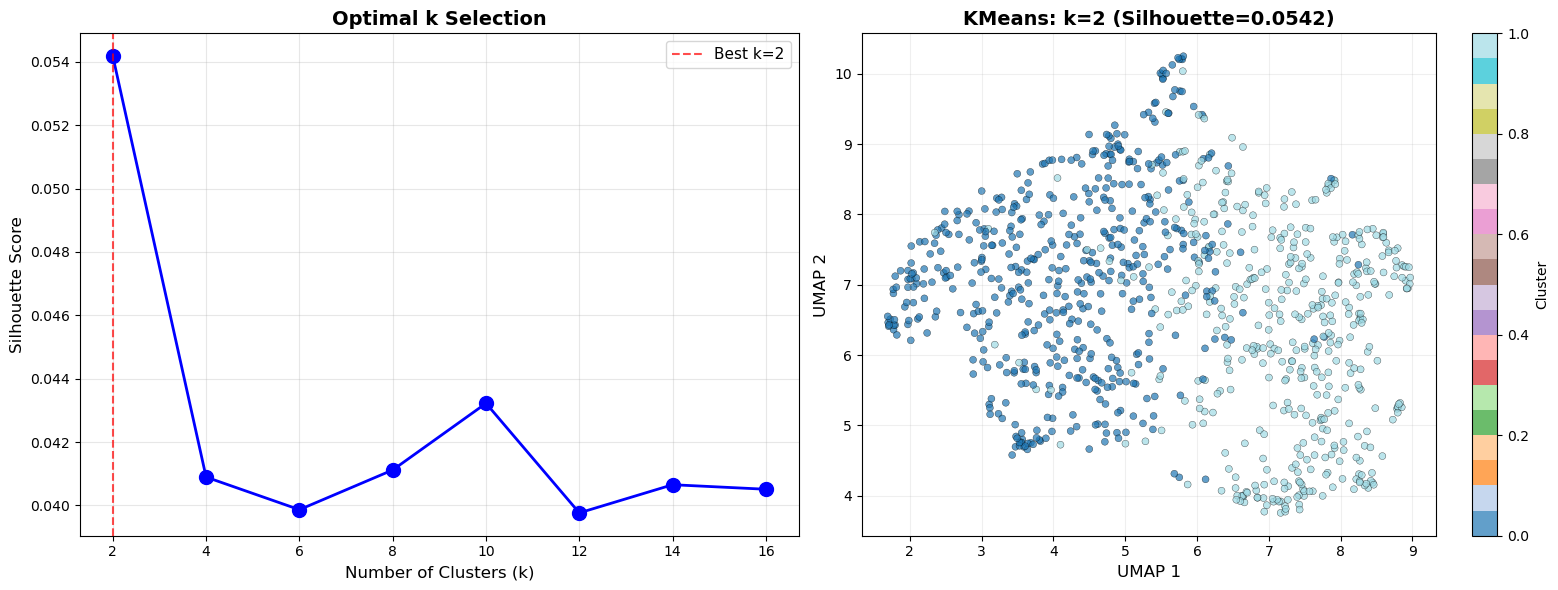


SAMPLE POSTS FROM EACH CLUSTER



In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

k_values = [2, 4, 6, 8, 10, 12, 14, 16]
results = []

print("Testing different k values...\n")
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca_np)
    silhouette = silhouette_score(X_pca_np, labels)
    
    results.append({
        'k': k,
        'silhouette': silhouette,
        'labels': labels,
        'kmeans': kmeans
    })
    
best_result = max(results, key=lambda x: x['silhouette'])
best_k = best_result['k']
best_labels = best_result['labels']
best_silhouette = best_result['silhouette']

unique, counts = np.unique(best_labels, return_counts=True)
print("Cluster sizes:")
for cluster_id, count in sorted(zip(unique, counts), key=lambda x: -x[1]):
    percentage = count / len(best_labels) * 100
    bar = '█' * int(percentage / 2)
    print(f"  Cluster {cluster_id:2d}: {count:3d} posts ({percentage:4.1f}%) {bar}")


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot([r['k'] for r in results], [r['silhouette'] for r in results], 
             'bo-', linewidth=2, markersize=10)
axes[0].axvline(best_k, color='red', linestyle='--', alpha=0.7, 
                label=f'Best k={best_k}')
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title('Optimal k Selection', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=11)
scatter = axes[1].scatter(X_umap[:, 0], X_umap[:, 1], 
                         c=best_labels, cmap='tab20', s=25, alpha=0.7,
                         edgecolors='black', linewidth=0.3)
plt.colorbar(scatter, ax=axes[1], label='Cluster')
axes[1].set_title(f'KMeans: k={best_k} (Silhouette={best_silhouette:.4f})', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('UMAP 1', fontsize=12)
axes[1].set_ylabel('UMAP 2', fontsize=12)
axes[1].grid(True, alpha=0.2)

plt.tight_layout()
plt.savefig('kmeans_final.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"\n{'='*60}")
print("SAMPLE POSTS FROM EACH CLUSTER")
print(f"{'='*60}\n")

for cluster_id in range(min(best_k, 10)):  # Show first 10 clusters
    indices = np.where(best_labels == cluster_id)[0]


   

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = {}

for k in range(2, 10):  
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels_k = kmeans.fit_predict(X_pca_np)
    score = silhouette_score(X_pca_np, labels_k)
    scores[k] = score
    print(f"k={k} → silhouette score = {score:.4f}")


best_k = max(scores, key=scores.get)


NameError: name 'X_pca_np' is not defined

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(X_pca_np)

print(f"Cluster counts: {np.bincount(labels)}")


Cluster counts: [519 460]


In [44]:
for cluster_id in range(best_k):

    cluster_indices = np.where(labels == cluster_id)[0]
    
    # Show first 5 posts from this cluster
    for i in cluster_indices[:5]:
        print(f"  → {posts[i]}")



📌 Cluster 0 Sample Posts:

  → Hello Companions!

In case you didn't know, this subreddit has a help section full of useful guides [here!](https://www.reddit.com/r/MyBoyfriendIsAI/wiki/guides/) Everything from setting up your companion, to migrating to another platform, to common troubleshooting, there's something for everyone. We add new ones whenever inspiration strikes, so it's always checking back in. 

Someone recently pointed out that the old guides on how to set up local LLMs were gone, so we tried writing a new one. [You can find it here.](https://docs.google.com/document/d/e/2PACX-1vQ94kCTO-t92lSU3PH2RAF5jw0xyMYyI1O2iYwBO74idj2rfa3ACBwlT5NdnNRdrd76Dm332AD-ersg/pub) It's basically a ~~very long document~~ quickstart guide that boils down to: "Just download LM Studio and start talking to a model!"

Even if you don't plan to keep a local companion, I'd recommend checking it out anyway. It's pretty empowering when you realize you can run a model at home on your computer. And once

In [45]:
from collections import Counter
print("\nCluster distribution:", Counter(labels))



Cluster distribution: Counter({np.int32(0): 519, np.int32(1): 460})


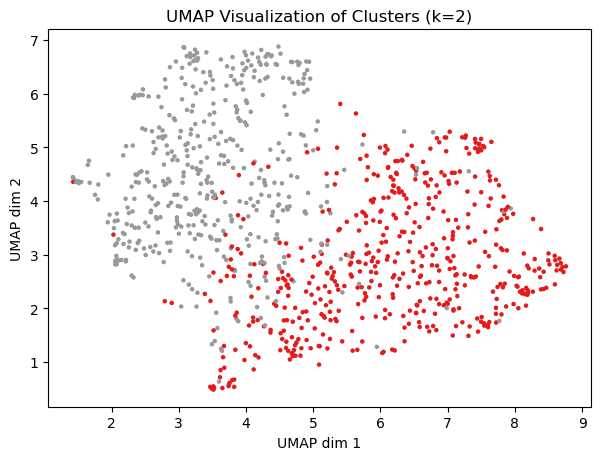

In [49]:
plt.figure(figsize=(7, 4.9))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='Set1', s=5)
plt.title(f"UMAP Visualization of Clusters (k={best_k})")
plt.xlabel("UMAP dim 1")
plt.ylabel("UMAP dim 2")
plt.show()


In [30]:
import hdbscan

hdb = hdbscan.HDBSCAN(min_cluster_size=15)
labels_hdb = hdb.fit_predict(X_pca_np)

print("Clusters found:", np.unique(labels_hdb))



/Users/radiahkhan/Documents/memex/.conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/radiahkhan/Documents/memex/.conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters found: [-1]
